In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange

In [2]:
from functions.ellipsoid import Ellipsoid
from functions.rosenbrock import Rosenbrock
from functions.log_ellipsoid import LogEllipsoid
from functions.attractive_sector import AttractiveSector
from functions.sum_of_different_powers import SumOfDifferentPowers

In [4]:
from optimizers.trust_region.trust_region import TrustRegion

In [5]:
def plot_contour(f, xs=10, ys=10):
    n = 500
    x, y = np.linspace(-xs, xs, n), np.linspace(-ys, ys, n)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            Z[i][j] = f([X[i][j], Y[i][j]])
    plt.contour(X,Y,Z, 50)

In [11]:
def print_state(xk, F):
    print("-----")
    print("x: ", xk)
    print("f(x): ", F.f(xk))
    print("f_grad(x): ", F.gradient(xk))
    print("f_hess(x):", F.hessian(xk))
    print("-----")
def plot_contour_from_function(minimize, F, xs=10, ys=10, g_tol=0.1, debug=False, start_point=[8,8]):
    xk_at_i = [start_point]
    if debug:
        print_state(start_point, F)
    def c(xk):
        if debug:
            print_state(xk, F)
        xk_at_i.append(xk)
        if np.linalg.norm(F.gradient(xk)) < g_tol:
            return True
        return False
    plot_contour(F.f, xs=xs, ys=ys)
    print(minimize(F.f, start_point, F.gradient, hes=F.hessian, callback=c))
    #print([np.linalg.norm(F.gradient(xk)) for xk in xk_at_i])
    #print(xk_at_i)
    plt.plot([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')
    plt.scatter([xk[0] for xk in xk_at_i[:-1]], [xk[1] for xk in xk_at_i[:-1]], c='orange')

In [ ]:
plot_contour_from_function(TrustRegion.minimize, Ellipsoid)

In [ ]:
plot_contour_from_function(TrustRegion.minimize, Rosenbrock, xs=10, ys=100)

LinAlgError: Matrix is not positive definite

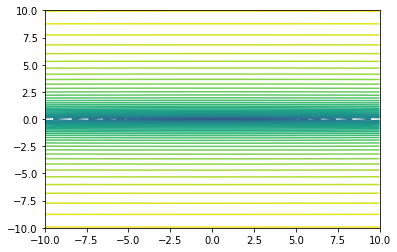

In [8]:
plot_contour_from_function(TrustRegion.minimize, LogEllipsoid)

/home/rasmuslovstad/Programs/assignments/num-opt/optimizers/trust_region/__init__.py:21: RuntimeWarning: invalid value encountered in double_scalars
  return (f(x) - f(x+p))/(m(np.zeros(len(x)), x) - m(p, x))


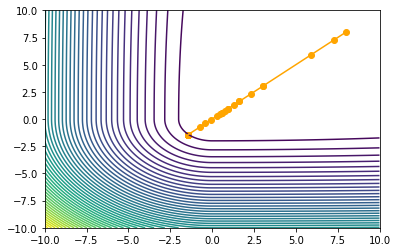

In [9]:
plot_contour_from_function(TrustRegion.minimize, AttractiveSector)

-----
x:  [8, 8]
f(x):  4160.0
f_grad(x):  [16.0, 2048.0]
f_hess(x): [[  2.   0.]
 [  0. 768.]]
-----
-----
x:  [7.98752105 7.00007787]
f(x):  2464.9073252587714
f_grad(x):  [15.97504210630879, 1372.0457851814315]
f_hess(x): [[  2.           0.        ]
 [  0.         588.01308141]]
-----
-----
x:  [7.83108409 5.00620538]
f(x):  689.4343500905275
f_grad(x):  [15.662168181161723, 501.8639261184166]
f_hess(x): [[  2.           0.        ]
 [  0.         300.74510798]]
-----
-----
x:  [4.19000465 3.35014363]
f(x):  143.522245996924
f_grad(x):  [8.38000930526119, 150.40084354757983]
f_hess(x): [[  2.           0.        ]
 [  0.         134.68154814]]
-----
-----
x:  [0.34861129 2.23493199]
f(x):  25.07076576193476
f_grad(x):  [0.6972225702745538, 44.653235106686374]
f_hess(x): [[ 2.          0.        ]
 [ 0.         59.93905217]]
-----
-----
x:  [-7.61429165  1.4654017 ]
f(x):  62.588773235577605
f_grad(x):  [-15.228583296250658, 12.58722694236272]
f_hess(x): [[ 2.          0.        ]
 

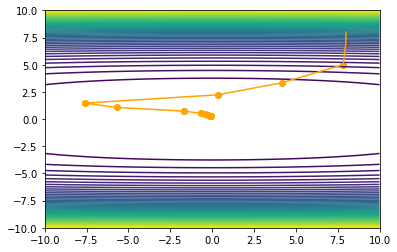

In [10]:
plot_contour_from_function(TrustRegion.minimize, SumOfDifferentPowers, debug=False)

In [ ]:
bb = np.array([[-7278.9319585, -1191.09660256],
 [-1191.09660256, 200.        ]])
np.linalg.eigvals(bb)
np.linalg.eigvals(bb + np.diag([7464.044546002779+0.0001, 7464.044546002779+0.0001]))